<h1>TAREA 5</h1>
<h2>Sergio Alejandro Diaz Pinilla</h2>
<h2>Julian Camilo Mendez Corredor</h2>
<br>
<br>
<h2>Punto 1</h2>

<p>1. Implementar y evaluar el filtro mediana adaptativo.<p>

<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; F. Prieto </h1>

In [1]:
%matplotlib inline
import cv2
import time
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division

# Imagenes de http://www.math.ucla.edu/~lvese/155.1.09w/
img = cv2.imread('Fig/ex.png',0)
print "Listo"

Listo


/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: overflow encountered in ubyte_scalars
/Users/sergiodiazpinilla/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: overflow encountered in ubyte_scalars


(<matplotlib.axes._subplots.AxesSubplot at 0x10f324a50>,
 <matplotlib.text.Text at 0x10fc4b190>)

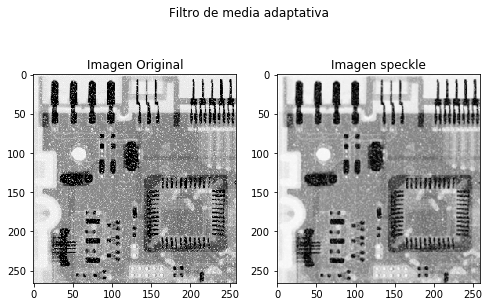

In [4]:
def opWindow(img,x,y,current,maximum):
    N, M = img.shape
    win_offset = current / 2
    xleft = x - win_offset
    
    xright = x + win_offset
    if xleft < 0:
        xleft = 0
    if xright >= N:
        xright = N - 1
    
    yup = y - win_offset
    ydown = y + win_offset
    if yup < 0:
        yup = 0
    if ydown >= M:
        ydown = M - 1
            
            
    window = img[int(xleft):int(xright), int(yup):int(ydown)] 
    #print window.shape
    #Level A
    zmed=window.mean()
    zmin=window.min()
    zmax=window.max()
        
    a1=zmed - zmin
    a2=zmed - zmax
    if(a1>0 and a2<0):
        b1=img[x,y] - zmin
        b2=img[x,y] - zmax
        if(b1>0 and b2<0):
            return img[x,y]
        else:
            return zmed
    else:
        current=current+1
        
    if(current<=maximum):
        return opWindow(img,x,y,current,maximum)
    else: 
        return img[x,y]

def salt_peper(size,salt = 125,peper = 125):
    generator = np.random.randint(0,255,size)
    noise = np.zeros(size)
    noise[generator <= peper] = 0
    noise[generator > salt] = 255
    return noise


def adaptative(img, current=2,maximum=3):
    img_filtered = np.zeros(img.shape)
    N, M = img.shape
    for i in xrange(0, N):
        for j in xrange(0, M):
            img_filtered[i, j] =opWindow(img,i,j,current,maximum)
    return img_filtered

filter=adaptative(img,2,7)

plt.figure(1,figsize=(8,5))
plt.suptitle("Filtro de media adaptativa")
plt.subplot(121), plt.imshow(img, cmap=plt.cm.gray), plt.title('Imagen Original')
plt.subplot(122), plt.imshow(hola, cmap=plt.cm.gray), plt.title('Imagen speckle')

<p>2. Implementar uno de los siguientes filtros:
  Filtro de rechazo Notch: ideal, Butterworth y gaussiano.
  Filtro de Notch óptimo.
<p>

(<matplotlib.axes._subplots.AxesSubplot at 0x1107bddd0>,
 <matplotlib.text.Text at 0x111d4f3d0>)

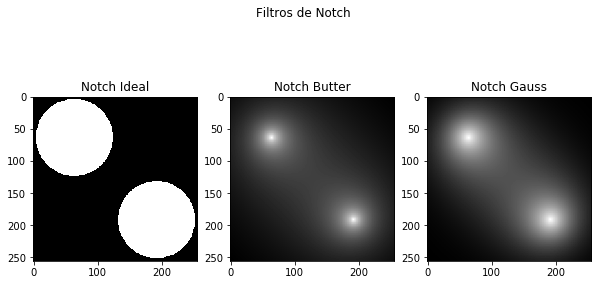

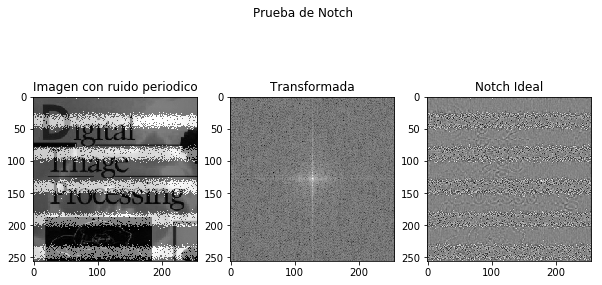

In [8]:
def fft(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    return fshift

def ifft(img):
    fshift = np.fft.ifftshift(img)
    f = np.fft.ifft2(fshift)
    return f.real

def notch_ideal(shape, f , pxd = 1):
    pxd = float(pxd)
    rows, cols = shape
    x = np.linspace(-0.5,0.5,cols) * cols/pxd
    y = np.linspace(-0.5,0.5,rows) * rows/pxd
    radius1 = np.sqrt(((x+rows/4)**2)[np.newaxis] + ((y+cols/4)**2)[:,np.newaxis])
    radius2 = np.sqrt(((x-rows/4)**2)[np.newaxis] + ((y-cols/4)**2)[:,np.newaxis])
    filt = np.zeros(shape)
    filt[radius1 <= f] = 1
    filt[radius2 <= f] = 1
    return filt

def notch_gauss(shape,filt,pxd=1):
    pxd = float(pxd)
    rows, cols = shape
    x = np.linspace(-0.5,0.5,cols) * cols/pxd
    y = np.linspace(-0.5,0.5,rows) * rows/pxd
    radius1 = np.sqrt(((x+rows/4)**2)[np.newaxis] + ((y+cols/4)**2)[:,np.newaxis])
    radius2 = np.sqrt(((x-rows/4)**2)[np.newaxis] + ((y-cols/4)**2)[:,np.newaxis])
    
    pot=-0.5*(radius1*radius2)/(filt**2)
    f=np.exp(pot)
    return f

def notch_butter(shape,filt,n,pxd=1):
    pxd = float(pxd)
    rows, cols = shape
    x = np.linspace(-0.5,0.5,cols) * cols/pxd
    y = np.linspace(-0.5,0.5,rows) * rows/pxd
    radius1 = np.sqrt(((x+rows/4)**2)[np.newaxis] + ((y+cols/4)**2)[:,np.newaxis])
    radius2 = np.sqrt(((x-rows/4)**2)[np.newaxis] + ((y-cols/4)**2)[:,np.newaxis])
    
    pot = (filt**2)/(radius1*radius2)
    f= 1 - 1/ (1+(pot**n))
    return f

def periodic_noise(shape):
    rows, cols = shape
    t = np.linspace(0, 10*np.pi, cols)
    img_per = np.zeros(shape)
    for i in range(cols-1):
        data = 3.0*np.sin(t+0.001) + 0.5 + np.random.randn(cols)
        img_per[:,i] = np.uint8(data)
    return img_per


libro = cv2.imread('Fig/libro.jpg',0)

notch_i = notch_ideal(libro.shape,60)
notch_butter = notch_butter(libro.shape,60,1)
notch_gauss = notch_gauss(libro.shape,60)


periodic_noise_i = periodic_noise(libro.shape)

ino = libro+periodic_noise_i
ff = fft(ino)
fil = ifft(ff*(notch_i+np.fliplr(notch_i)))

plt.figure(1,figsize=(10,5))
plt.suptitle('Filtros de Notch')
plt.subplot(131), plt.imshow(notch_i, cmap=plt.cm.gray), plt.title('Notch Ideal')
plt.subplot(132), plt.imshow(notch_butter, cmap=plt.cm.gray), plt.title('Notch Butter')
plt.subplot(133), plt.imshow(notch_gauss, cmap=plt.cm.gray), plt.title('Notch Gauss')

plt.figure(2,figsize=(10,5))
plt.suptitle('Prueba de Notch')
plt.subplot(131), plt.imshow(ino, cmap=plt.cm.gray), plt.title('Imagen con ruido periodico')
plt.subplot(132), plt.imshow(20*np.log(abs(ff)), cmap=plt.cm.gray), plt.title('Transformada')
plt.subplot(133), plt.imshow(fil, cmap=plt.cm.gray), plt.title('Notch Ideal')

Podemos ver que con el filtro de noch al a


<p>3. Evaluar el filtro de Wiener para una imagen degradada con un kernel de convolución tipo “motion” y además con ruido aditivo (ver Fig. 5.29, libro de Gonzalez – Diapositiva 96).</p>

(<matplotlib.axes._subplots.AxesSubplot at 0x1102d1d50>,
 <matplotlib.text.Text at 0x112067b90>)

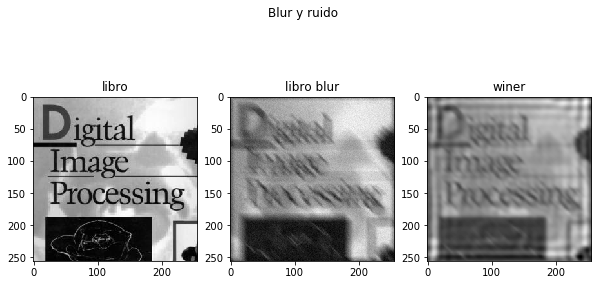

In [9]:
from scipy.signal import gaussian, convolve2d
from skimage import restoration

def blur(img, mode='box', block_size=3):
    
    dummy=np.copy(img)
    if mode=='box':
        kernel=np.ones((block_size,block_size))/block_size**2
    elif mode== 'gauss':
        kernel=gaussian(block_size,block_size/3).reshape(block_size,1)
        kernel=np.dot(kernel,kernel.transpose())
        kernel /= np.sum(kernel)
    elif mode=='motion':
        kernel=np.eye(block_size)/ block_size
    dummy =convolve2d(dummy,kernel,mode='same')
    return dummy,kernel

def blur_2(img,T,a,b,pxd=1):
    pxd = float(pxd)
    rows, cols = img.shape
    u = np.linspace(-0.5,0.5,cols) * cols/pxd
    v = np.linspace(-0.5,0.5,rows) * rows/pxd
    const = np.pi*((u*a)[np.newaxis] + (v*b)[:,np.newaxis])+0.000000001
    ex = np.exp(-1j*const)
    si = np.sin(const)
    F = fft(img)
    res = (T/const) * si*ex * F
    
    return ifft(res)


blur_lib,h1 = blur(libro,'motion',15)
#blur_lib2 = blur_2(libro,1,0.1,0.1)
#ruido

blur_lib += 0.1*blur_lib.std() * np.random.standard_normal(blur_lib.shape)
#blur_lib2+= 0.1*blur_lib2.std() * np.random.standard_normal(blur_lib2.shape)

res_1 = restoration.wiener(blur_lib,h1,1,clip=False)


plt.figure(1,figsize=(10,5))
plt.suptitle('Blur y ruido')
plt.subplot(131), plt.imshow(libro, cmap=plt.cm.gray), plt.title('libro')
plt.subplot(132), plt.imshow(blur_lib, cmap=plt.cm.gray), plt.title('libro blur')
plt.subplot(133), plt.imshow(res_1, cmap=plt.cm.gray), plt.title('winer')
